In [1]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [2]:
#Data Loading
X_train = pd.read_csv("X_train.csv") 
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv") 


##Need to normalize data before training
##Learnin rate is clearly too high

#### Building the model

In [3]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],))) 
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [4]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)
# , callbacks=[early_stop]

Epoch 1/50
90/90 [==============================] - 0s 2ms/step - loss: 12850.2031 - accuracy: 0.5545 - val_loss: 18964.8574 - val_accuracy: 0.3801
Epoch 2/50
90/90 [==============================] - 0s 1ms/step - loss: 15213.8877 - accuracy: 0.5396 - val_loss: 15548.2139 - val_accuracy: 0.6231
Epoch 3/50
90/90 [==============================] - 0s 1ms/step - loss: 16966.6660 - accuracy: 0.5562 - val_loss: 12799.8301 - val_accuracy: 0.4922
Epoch 4/50
90/90 [==============================] - 0s 1ms/step - loss: 19253.9355 - accuracy: 0.5490 - val_loss: 18865.1816 - val_accuracy: 0.6231
Epoch 5/50
90/90 [==============================] - 0s 1ms/step - loss: 13837.2471 - accuracy: 0.5510 - val_loss: 17476.3027 - val_accuracy: 0.4330
Epoch 6/50
90/90 [==============================] - 0s 1ms/step - loss: 17362.8926 - accuracy: 0.5368 - val_loss: 17134.8047 - val_accuracy: 0.6386
Epoch 7/50
90/90 [==============================] - 0s 1ms/step - loss: 25637.4648 - accuracy: 0.5427 - val_loss

In [12]:
model.evaluate(X_train, y_train)


101/101 [==============================] - 0s 988us/step - loss: 20051.4961 - accuracy: 0.3905


[20051.49609375, 0.3905029594898224]

In [13]:
model.evaluate(X_test, y_test)

34/34 [==============================] - 0s 615us/step - loss: 20482.7715 - accuracy: 0.3801


[20482.771484375, 0.38014981150627136]

In [14]:
# Predict on the test set
y_pred_prob = model.predict(X_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.5022193113772454


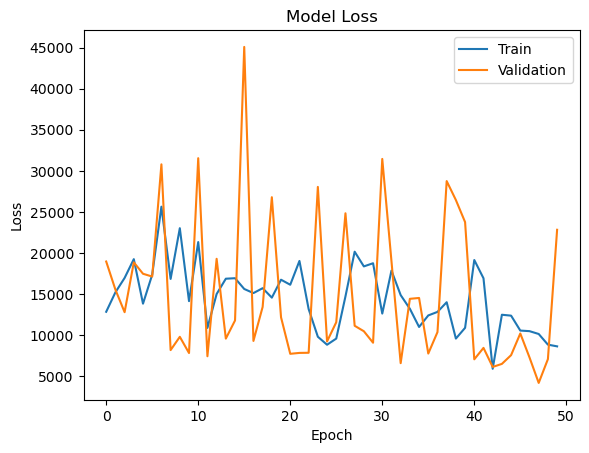

In [15]:
#plot the training and validation curve

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()